# Basic Mirage Maze Solving Algorithm
To set up a benchmark for optimized solving algorithms we added the wall check to the Uniform Cost Search Algorithm. The algorithm doesn't check walls optimally, it checks every wall in the maze. This means that the cost of using this algorithm will be massively dependent on the cost of checking a wall.  

In [3]:
import sys
import random
sys.path.append("../")
from pprint import pprint
from Core.maze import Maze, INF
from queue import PriorityQueue

In [10]:
# We need the code to create the mirage maze
def Mirage(maze, p):
    """
    maze is the original maze onto which we superpose the mirage layer
    p is the probability with which we add an apparent wall
    """
    perceived_maze = Maze(maze.num_rows, maze.num_columns)
    for x in range(0, maze.num_columns):
        for y in range(0, maze.num_rows):
            # Copy the contents of the original maze
            perceived_maze.grid[x][y].neighbors = dict.copy(maze.grid[x][y].neighbors)
            
            # For each cardinal direction, check if a path exists in that direction from a particular node
            # If there is a path, then 
            if maze.grid[x][y].neighbors['W'] != INF:
                if(random.uniform(0, 1) <= p):
                    perceived_maze.add_path((x, y), 'W', INF)
                    
            if maze.grid[x][y].neighbors['E'] != INF:
                if(random.uniform(0, 1) <= p):
                    perceived_maze.add_path((x, y), 'E', INF)
            
            if maze.grid[x][y].neighbors['N'] != INF:
                if(random.uniform(0, 1) <= p):
                    perceived_maze.add_path((x, y), 'N', INF)
            
            if maze.grid[x][y].neighbors['S'] != INF:
                if(random.uniform(0, 1) <= p):
                    perceived_maze.add_path((x, y), 'S', INF)
    return perceived_maze

def check(perceived_maze, original_maze, x, y, direction):
    if perceived_maze.grid[x][y].neighbors[direction] != original_maze.grid[x][y].neighbors[direction]:
        perceived_maze.grid[x][y].neighbors[direction] = original_maze.grid[x][y].neighbors[direction]
        return True
    return False

Since this is purely indicative of how a solution would work, we do not deny the algorithm access to the original maze. To ensure that this is representative of how a mirage maze would be solved, we simply do not use knowledge of the original maze anyhwere. In a more rigorous setting we'd ensure that the original maze is obscure, and only the perceived maze is visible to the solving agent. 

In [11]:
def UCS_Mirage(maze, original_maze, start, end, move_cost, search_cost):
    # setup
    explored = set()
    frontier = PriorityQueue()
    node = start
    cost = 0
    n_rows = len(maze.grid)
    n_cols = len(maze.grid[0])
    parents = [[(-1, -1)]*n_cols for i in range(n_rows)]


    # init
    frontier.put((cost, node))
    while not frontier.empty():
        cost, node = frontier.get()
        if node == end:
            return True, cost, parents

        explored.add(node)
        x, y = node
        
        if(maze.grid[x][y].neighbors['N'] == INF):
            check(maze, original_maze, x, y, 'N')
            cost += search_cost
        if(maze.grid[x][y].neighbors['S'] == INF):
            check(maze, original_maze, x, y, 'S')
            cost += search_cost
        if(maze.grid[x][y].neighbors['E'] == INF):
            check(maze, original_maze, x, y, 'E')
            cost += search_cost
        if(maze.grid[x][y].neighbors['W'] == INF):
            check(maze, original_maze, x, y, 'W')
            cost += search_cost
        
        neighbors = maze.grid[x][y].neighbors
        if neighbors['N'] != INF and (x-1, y) not in explored and x>0:
            cost += move_cost
            frontier.put((cost+neighbors['N'], (x-1, y)))
            parents[x-1][y] = (x, y)
        if neighbors['S'] != INF and (x+1, y) not in explored and x+1<n_rows:
            cost += move_cost
            frontier.put((cost+neighbors['S'], (x+1, y)))
            parents[x+1][y] = (x, y)
        if neighbors['E'] != INF and (x, y+1) not in explored and y+1<n_cols:
            cost += move_cost
            frontier.put((cost+neighbors['E'], (x, y+1)))
            parents[x][y+1] = (x, y)
        if neighbors['W'] != INF and (x, y-1) not in explored and y>0:
            cost += move_cost
            frontier.put((cost+neighbors['W'], (x, y-1)))
            parents[x][y-1] = (x, y)


    return False, -1, []


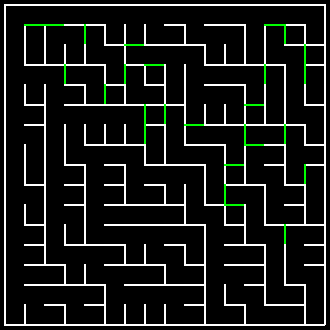

In [29]:
maze = Maze()
maze.load("BinaryTree_16x16.maze")
mirage_maze = Mirage(maze, 0.2)
display(mirage_maze.diff(maze, cell_width = 20))

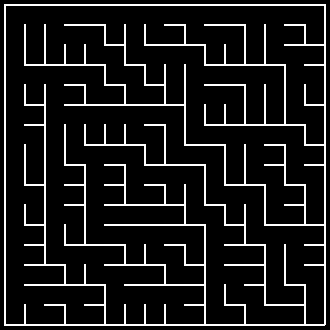

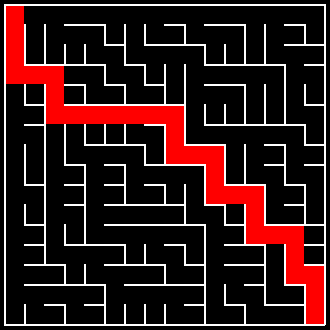

Cost :  274


In [31]:
start = (0, 0)
end = (15, 15)

found, cost, parents = UCS_Mirage(mirage_maze, maze, start, end, 1, 5)

node = end
path = [node]
while node != start:
    node = parents[node[0]][node[1]]
    path.append(node)
    

if found:
    # print("Cost is: ", cost)
    # print(path)
    display(mirage_maze.diff(maze, cell_width = 20))
    mirage_maze.add_colors(path = path)
    display(mirage_maze.draw(cell_width = 20))
    print("Cost : ", cost)
else:
    print("Path not found!")

### Result
As we can see, the mirage maze has no difference from the original maze. All the mirage walls were checked and hence we have a high cost. Increasing the cost of checking a wall will lead to higher and higher costs, as the algorithm checks all the walls. 